In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
# Load datasets
train = pd.read_csv('train_ctrUa4K.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# **Exploratory Data Analysis**

In [55]:
train.shape

(614, 13)

In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [57]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


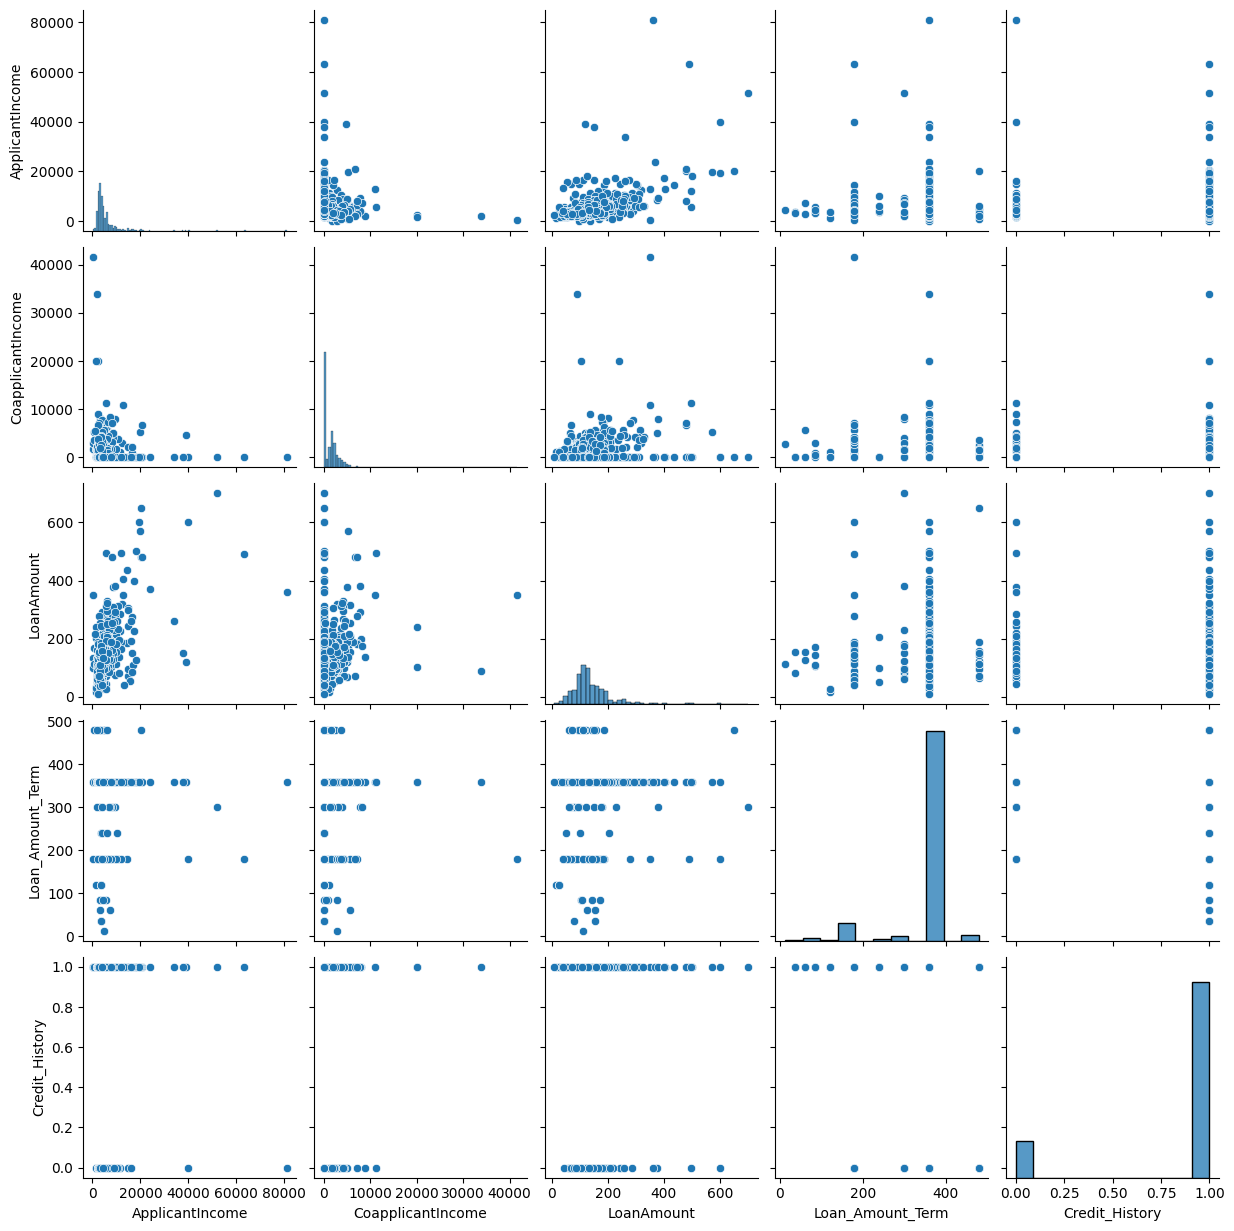

In [58]:
sns.pairplot(train)
plt.show()

# **Preprocessing**

In [59]:
# Handle missing values
from sklearn.impute import SimpleImputer

In [60]:
imputer = SimpleImputer(strategy='median')
train['LoanAmount'] = imputer.fit_transform(train[['LoanAmount']])
train['Loan_Amount_Term'] = imputer.fit_transform(train[['Loan_Amount_Term']])
train['Credit_History'] = imputer.fit_transform(train[['Credit_History']])

In [61]:
imputer_cat = SimpleImputer(strategy='most_frequent')
train['Gender'] = imputer_cat.fit_transform(train[['Gender']]).ravel()
train['Married'] = imputer_cat.fit_transform(train[['Married']]).ravel()
train['Dependents'] = imputer_cat.fit_transform(train[['Dependents']]).ravel()
train['Self_Employed'] = imputer_cat.fit_transform(train[['Self_Employed']]).ravel()

In [62]:
from sklearn.preprocessing import LabelEncoder

In [63]:
# Encode categorical variables
label_encoder = LabelEncoder()
categorical_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for column in categorical_columns:
    train[column] = label_encoder.fit_transform(train[column])

**Repeat above process for test data**

In [64]:
# Load datasets
test = pd.read_csv('test_lAUu6dG.csv')
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [65]:
test.shape

(367, 12)

In [66]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [67]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


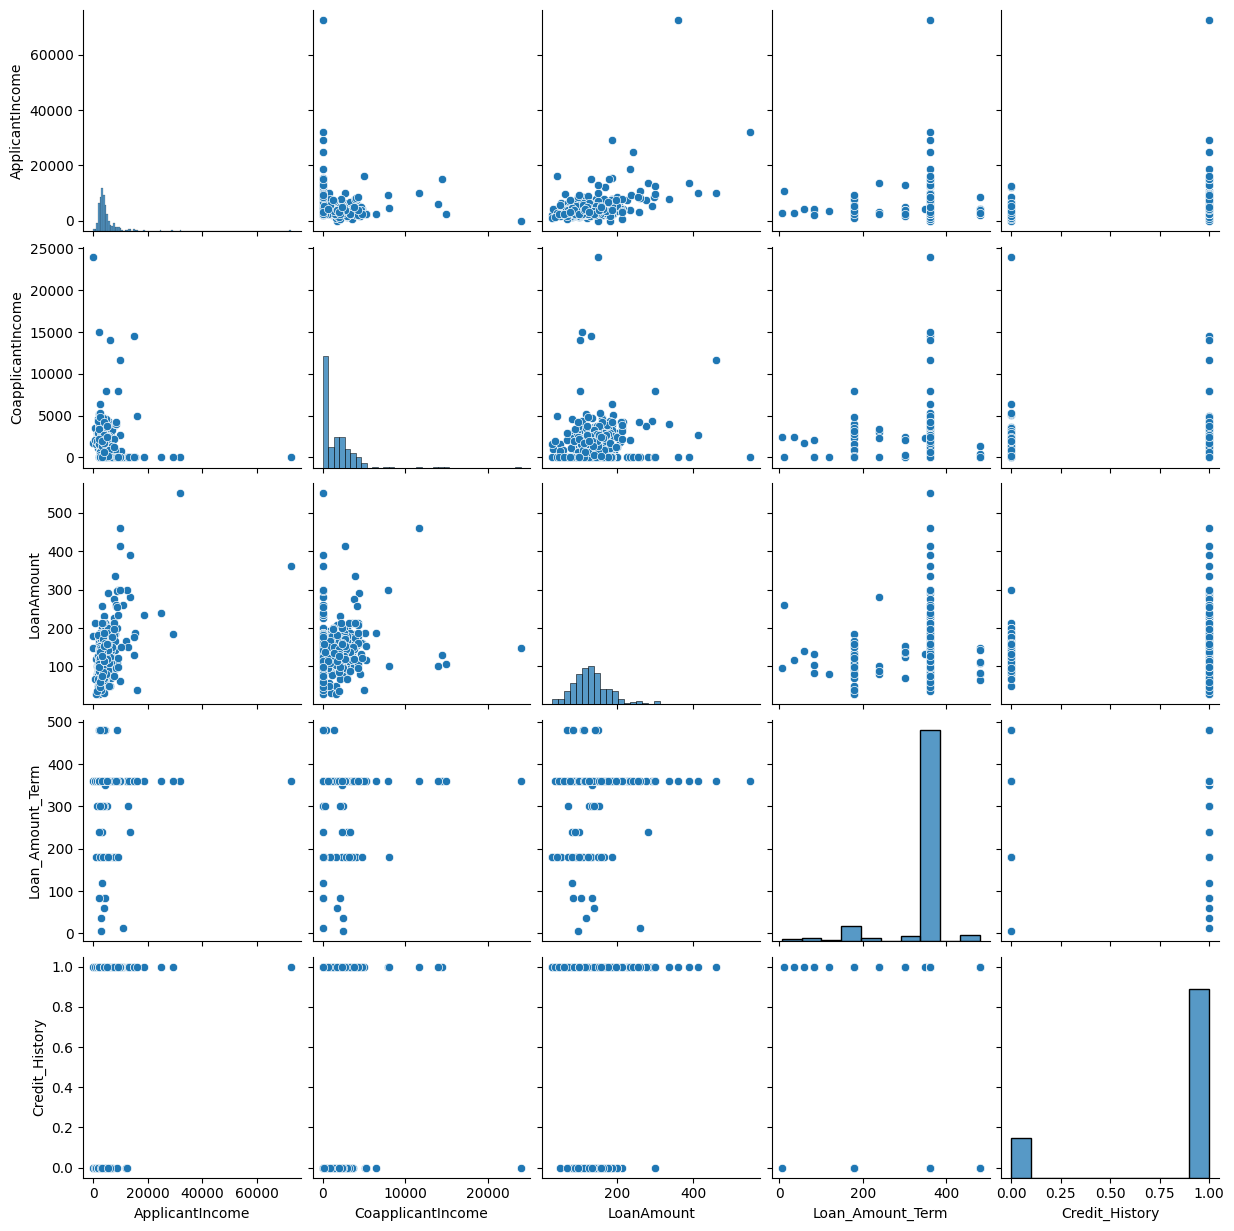

In [33]:
sns.pairplot(test)
plt.show()

In [68]:
imputer1 = SimpleImputer(strategy='median')
test['LoanAmount'] = imputer1.fit_transform(test[['LoanAmount']])
test['Loan_Amount_Term'] = imputer1.fit_transform(test[['Loan_Amount_Term']])
test['Credit_History'] = imputer1.fit_transform(test[['Credit_History']])

In [69]:
imputer_cat1 = SimpleImputer(strategy='most_frequent')
test['Gender'] = imputer_cat1.fit_transform(test[['Gender']]).ravel()
test['Married'] = imputer_cat1.fit_transform(test[['Married']]).ravel()
test['Dependents'] = imputer_cat1.fit_transform(test[['Dependents']]).ravel()
test['Self_Employed'] = imputer_cat1.fit_transform(test[['Self_Employed']]).ravel()

# **Feature Selection**

In [70]:
# Separate features and target
X = train.drop(columns=['Loan_ID', 'Loan_Status'])
y = train['Loan_Status']

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Logistic Regression**

In [80]:
# Carried out Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
# Handle non-numeric values in X_train AND X_test
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_train = X_train.fillna(X_train.mean())

X_test = X_test.apply(pd.to_numeric, errors='coerce') # Apply the same transformations to X_test
X_test = X_test.fillna(X_test.mean())

# Fit the model again
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [81]:
# define empty dictionary to store acuuracy score
results = {}

In [82]:
# Evaluate the model
from sklearn.metrics import confusion_matrix, accuracy_score
# store the accuracy score in the dictionary
results['Logistic Regression'] = accuracy_score(y_test, y_pred)

# **KNN**

In [83]:
# Carried out the KNN Model & store the accuracy score in the dictionary
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neigbors = np.arange(3,15)

for k in neigbors:
  classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski',p=2)
  classifier.fit(X_train,y_train)
  y_pred = classifier.predict(X_test)
  acc = accuracy_score(y_test,y_pred)
  metric_k.append(acc)

metric_k
results['KNN'] = max(metric_k)

# **SVM**

In [84]:
# Carried out the SVM Model & store the accuracy score in the dictionary
from sklearn.svm import SVC
sv_clf = SVC(kernel = 'linear')
sv_clf.fit(X_train,y_train)
y_pred = sv_clf.predict(X_test)
results['SVM'] = accuracy_score(y_test, y_pred)

# **Decision Tree**

In [85]:
# Carried out the Decision Tree Model & store the accuracy score in the dictionary
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train,y_train)
y_pred = dt_clf.predict(X_test)
results['Decision Tree'] = accuracy_score(y_test, y_pred)

# **Random Forest**

In [97]:
# Carried out the Random Forest Model & store the accuracy score in the dictionary
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_test)
results['Random Forest'] = accuracy_score(y_test, y_pred)

# **Hyper parameter tuning**

tried with different n_estimators value

In [96]:
rf_clf1 = RandomForestClassifier(criterion='Entropy',n_estimators=40)
rf_clf1 = RandomForestClassifier()
rf_clf1.fit(X_train,y_train)
y_pred = rf_clf1.predict(X_test)
accuracy_score(y_test, y_pred)

0.7642276422764228

# **Best Model**

In [98]:
# To show the results
results

{'Logistic Regression': 0.7886178861788617,
 'KNN': 0.6178861788617886,
 'SVM': 0.7886178861788617,
 'Decision Tree': 0.6910569105691057,
 'Random Forest': 0.7398373983739838}

# **Best Model - Logistic Regression and SVM**

# **Predict test data using Logistic Regression**

In [101]:
# Iterate through columns of test_X and encode categorical features
for col in test_X.columns:
    if test_X[col].dtype == 'object':  # Check if column is of object (string) type
        test_X[col] = le.fit_transform(test_X[col])

# Now predict using the encoded data
test['Loan_Status'] = lr.predict(test_X)
test['Loan_Status'] = test['Loan_Status'].apply(lambda x: 'Y' if x == 1 else 'N')

Export to csv

In [102]:
# to save csv the predictions
test[['Loan_ID', 'Loan_Status']].to_csv('predictions.csv', index=False)